# PILes
Simple wrapper for Python PIL to draw multiple shapes on the same picture.

In [1]:
# External imports. Matplotlib for simple displays
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

In [2]:
# Imports from this module.
from piles import PILe, ImageDraws
from distributions import Spiral, Parametric, Circular, RandomCoords, Uniform
from colorpiles import ColorPile
from functions import Distance, Angle, Value

## The module is separated in 4 main components: 

#### distributions.py to generate coordinates of complex distributions. 
Classes must output coordinates in the [-1, 1] range.

#### functions.py to generate weights for the coordinates
Classes must ouput weights in the [0, 1] range.

#### colorpiles.py to generate complex colormaps
To be used by PILes. 

#### piles.py for the interface with PIL
To draw complex images

## 1. Distributions
Distributions output a tuple of (x, y) coordinates in the [-1, 1] range.

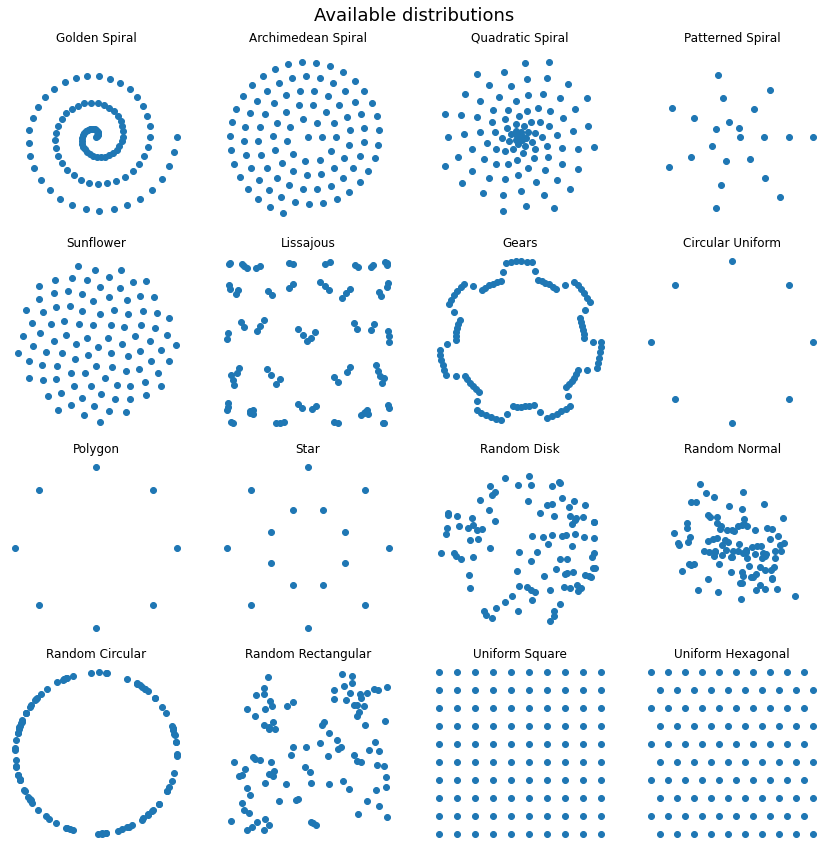

In [3]:
# Available distributions for now.
distribs = [Spiral().golden(), Spiral().archimedean(), Spiral().quadratic(), Spiral().patterned(),
                Parametric().sunflower(), Parametric().lissajous(), Parametric().gear(),
                Circular().uniform(), Circular().polygon(), Circular().star(),
                RandomCoords().disk(), RandomCoords().normal(), RandomCoords().circular(), RandomCoords().rectangular(),
                Uniform().square(), Uniform().hexagon()]
    
names = ['Golden Spiral', 'Archimedean Spiral', 'Quadratic Spiral', 'Patterned Spiral',
         'Sunflower', 'Lissajous', 'Gears',
         'Circular Uniform', 'Polygon', 'Star',
         'Random Disk', 'Random Normal', 'Random Circular', 'Random Rectangular',
         'Uniform Square', 'Uniform Hexagonal']

fig, axes = plt.subplots(figsize=(12, 12), nrows=4, ncols=4, sharex=True, sharey=True)
ax = axes.ravel()

# Let's plot them
for i, (dist, name) in enumerate(zip(distribs, names)):

    ax[i].scatter(*dist)
    ax[i].set_aspect('equal')
    ax[i].set_title(name)
    ax[i].axis('off')

fig.suptitle('Available distributions', fontsize=18)
fig.tight_layout(pad=1.2)

Each distribution has parameters to change the final shape. Example here when changing the parameter k of quadratic spirals.

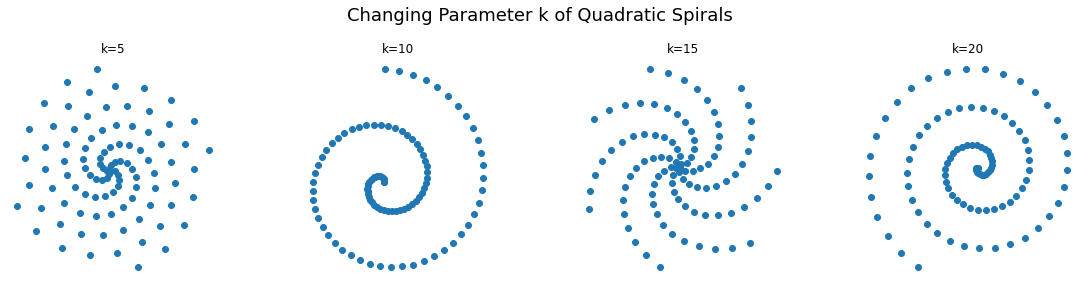

In [4]:
fig, axes = plt.subplots(figsize=(16,4), ncols=4, nrows=1)
ax = axes.ravel()
[(x.axis('off'), 
  x.set_aspect('equal'),) for x in ax]

for i, k in enumerate([5, 10, 15, 20]):
    x, y = Spiral(n=100).quadratic(k=k)
    ax[i].scatter(x, y)
    ax[i].set_title(f'k={k}')

fig.suptitle('Changing Parameter k of Quadratic Spirals', fontsize=18)
fig.tight_layout(pad=1.2)

And for sunflower distributions:

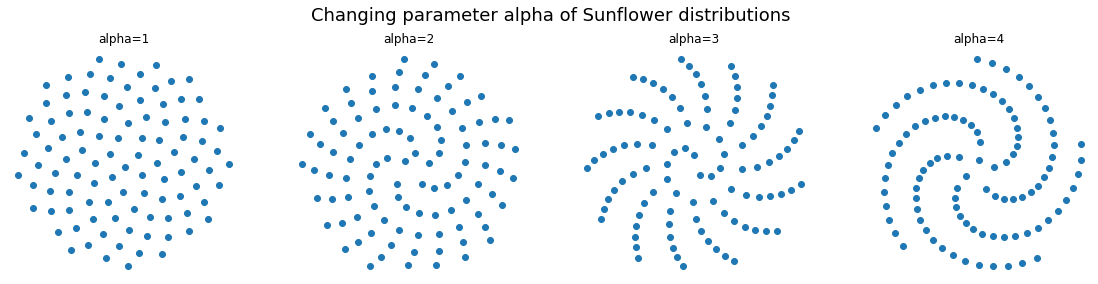

In [5]:
fig, axes = plt.subplots(figsize=(16,4), ncols=4, nrows=1)
ax = axes.ravel()
[(x.axis('off'), 
  x.set_aspect('equal'),) for x in ax]

for i, a in enumerate([1, 2, 3, 4]):
    x, y = Parametric(n=100).sunflower(alpha=a)
    ax[i].scatter(x, y)
    ax[i].set_title(f'alpha={a}')

fig.suptitle('Changing parameter alpha of Sunflower distributions', fontsize=18)
fig.tight_layout(pad=1.2)

## 2. Functions
Functions to create weights from the coordinates generated by the distributions. It has to outputs values between 0 and 1.
Available: dependent to distance from the centre of the distribution and dependent to the angle theta of the point.

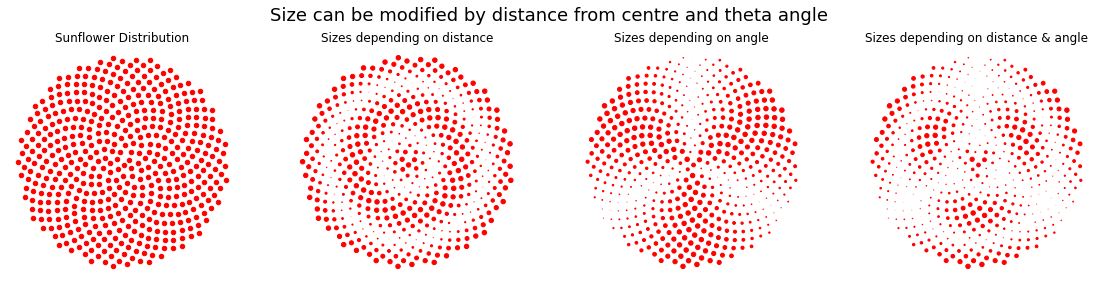

In [6]:
fig, axes = plt.subplots(figsize=(16,4), ncols=4, nrows=1)
ax = axes.ravel()
[(x.axis('off'), 
  x.set_aspect('equal'),) for x in ax]

x, y = Parametric(n=500).sunflower() # 500 points with sunflower distribution

# Examples of use
sizes = Distance(x, y).wave(waves=2) # 2 waves depending on distance from centre
sizes2 = Angle(x, y).wave(waves=3) # 3 waves depending on the theta angle of the point

ax[0].scatter(x, y, s=20, c = 'red')
ax[0].set_title('Sunflower Distribution')

ax[1].scatter(x, y, s=sizes*20, c = 'red')
ax[1].set_title('Sizes depending on distance')

ax[2].scatter(x, y, s=sizes2*20, c = 'red')
ax[2].set_title('Sizes depending on angle')

ax[3].scatter(x, y, s=sizes*sizes2*20, c = 'red') # Simply multiply the sizes to combine them 
ax[3].set_title('Sizes depending on distance & angle');

fig.suptitle('Size can be modified by distance from centre and theta angle', fontsize=18)
fig.tight_layout(pad=1.2)


## 3. Color maps
Module made to easily create color maps.

They can be created from Matplotlib colormaps:

ColorPile inferno, length 20.

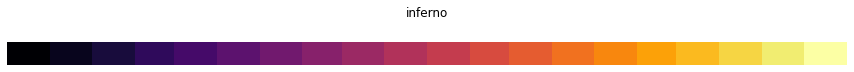

In [7]:
ColorPile().from_matplotlib('inferno', n=20)

Inverted, added together.

ColorPile RdBu+RdBu_inverted, length 40.

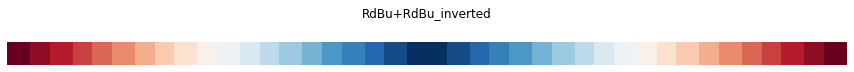

In [8]:
cmap = ColorPile().from_matplotlib('RdBu', n=20)
cmap + cmap.invert()

They can also be created from list of known color names or (R, G, B) tuples and then be interpolated:

ColorPile from_list-extended_20, length 20.

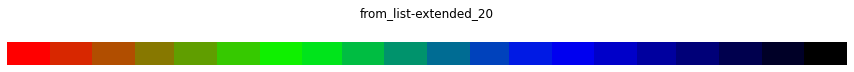

In [9]:
ColorPile().from_list(color_list=[(255, 0, 0), 'green', 'blue', (0, 0, 0)]).extend(20)

Everything can be combined to produce complex colormaps.

ColorPile Shiny one, length 210.

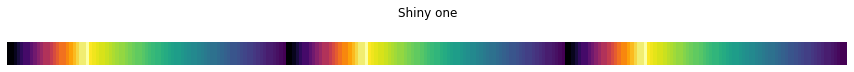

In [10]:
cmap1 = ColorPile().from_matplotlib('inferno', n=20)
cmap2 = ColorPile().from_matplotlib('viridis', n=50).invert()

cmap3 = (cmap1 + cmap2).loop(n=2).set_name('Shiny one')
cmap3

## 4.PILes
Wrapper made on top of PIL to draw multiple shapes with different sizes, colors, alphas, etc... in a single call.
It is fully compatible with PIL, uses the same format and outputs the same kind of images.
However, it has to be fed with a PILe dataclass containing the coordinates, sizes, colors, angles, etc... generated by the distributions, functions, colormaps modules.

As it is using PIL, remember that color values are in (R, G, B) with values between 0 and 255, alphas are between 0 and 255, angles between 0 and 360 degrees, contour widths must be integer, etc...

The default PILe class is as follow:

    @dataclass
    class PILe:    
        coords = (np.asarray([0]), np.asarray([0])) # one object at (0, 0), centre of the image
        height = 2              # see below
        width = 2
        shapes = 'circle'       # A circle
        sizes = 20              # of size 20
        alphas = 255            # fully visible
        colors = (255, 0, 0)    # red
        outlines = (0, 0, 0)    # with black outline
        widths = 3              # of width 3
        angles = 0              # not rotated
        ratios = 1              # height & width of the object are the same
        
        images =  Image.new("RGBA", (10, 10), (255, 255, 255, 0)) # A transparent 10*10 image, to be used by DrawImages


Note the height and width of 2: as the x and y coordinates will be scaled by PILe.width/2 + img.width/2. To enter 2 allows to simply enter the coordinates of the points wherever we want, keeping the centre of the image as (0, 0). Any number other than 2 will scale the coordinates to fit in a (width, height) rectangle in the centre of the image.  

When using the default PILe class, it should generate a single red disk with dark outline, in the centre of the image:

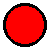

In [11]:
# First, creating a regular PIL image
img1 = Image.new("RGBA", (50, 50), (255, 255, 255, 255))

default = PILe()
# Calling ImageDraws from PILes for multiple drawings
drawer = ImageDraws(img1) 
# And DrawShapes from PILes
drawer.DrawShapes(default) 

display(img1)

We can use it to draw multiple shapes on a single image at any coordinates. However, rememeber the (0,0) reference is at the centre of the image.
As we enter list of values, they will be cycled to reach the proper length

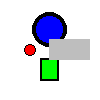

In [12]:
mult = PILe()
mult.coords = [-20, 0, 0, 20], [0, 20, -20, 0] # We can add coordinates, (0,0) is the centre of the image
mult.sizes = [5, 10, 15, 10] # Different sizes of objects
mult.widths = [1, 2, 4, 0] # Different widths of contours
mult.colors = ['red', 'green', 'blue', 'grey'] # Different colors
mult.shapes = ['circle', 'rectangle']  # Different shapes.
mult.ratios = [1, 0.8, 1, 2] # ratios define the width/height ratio of the shape. For rectangles and ellipses.

img2 = Image.new("RGBA", (100, 100), (255, 255, 255, 2555))
drawer = ImageDraws(img2)
drawer.DrawShapes(mult)
display(img2)

By using the distributions module, we can easily generate multiple coordinates and simply pass them to the PILe dataclass:

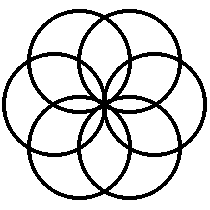

In [13]:
rosetta = PILe() # Let's draw a simple rosetta.
rosetta.coords = Circular(n=6).uniform(turns=1) # This will produce 6 points, uniformly spread on a circle.
rosetta.height, rosetta.width = 100, 100 # These are the dimensions for the centres of the circles
rosetta.shapes = 'circle' # We will draw circles
rosetta.sizes = 50 # Half the size of the image for regular rosetta
rosetta.colors = None # No colors will keep the shape empty
rosetta.outlines = 'black'
rosetta.widths = 4

# With centres in a 100*100 pixels area and radius of 50, the image will be 200 pixels wide and length
img3 = Image.new("RGBA", (210, 210), (255, 255, 255, 255))
drawer = ImageDraws(img3)
drawer.DrawShapes(rosetta)
display(img3)

We can use the colormaps made with ColorPiles as individual shape color:

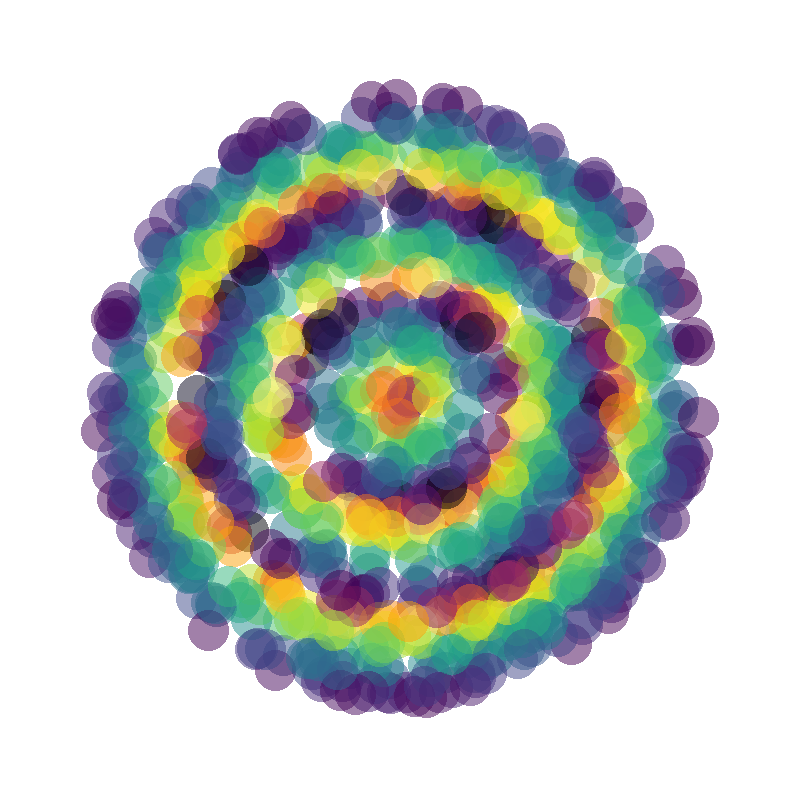

In [14]:
disk = PILe()
disk.height, disk.width = 600, 600
x, y = RandomCoords(n=1000).disk() # Just 1000 circles in a random disk distribution
disk.coords = x, y
disk.sizes = 20 # Single size
disk.colors = cmap3.map_to_distance(x, y) # Using the previous cmap3 indexed by distance.
disk.alphas = 128 # Adding transparency to each disk. Alphais between 0 and 255
disk.widths = 0 # No contour

img4 = Image.new("RGBA", (800, 800), (255, 255, 255, 255))
drawer = ImageDraws(img4)
drawer.DrawShapes(disk)
display(img4)

We can play with colors, contours, alphas, sizes, etc...

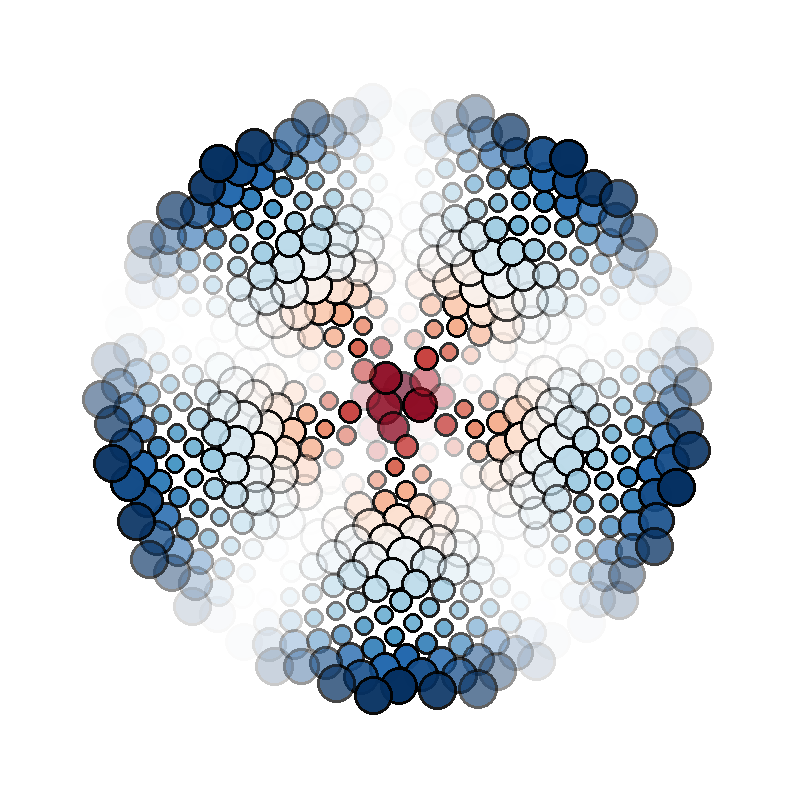

In [15]:
sunflower = PILe()
sunflower.height, sunflower.width = 600, 600
x, y = Parametric(n=500).sunflower()
sunflower.coords = x, y

# As functions outputs weights between 0 and 1, we have to scale the sizes to pixels.
sunflower.sizes = Distance(x, y).wave(waves=2) * 10 + 8

sunflower.colors = ColorPile().from_matplotlib('RdBu', n=20).map_to_distance(x, y)
sunflower.alphas = [int(x) for x in Angle(x, y).wave(waves=5) * 255]
# Note that I did not specify any contours, but it is 3 pixels by default

img5 = Image.new("RGBA", (800, 800), (255, 255, 255, 255))
drawer = ImageDraws(img5)
drawer.DrawShapes(sunflower)
display(img5)

And play with shapes as well. Accepted shapes are triangle, square, rectangle, pentagon, hexagon, heptagon, octagon and any regular shape called 'n-gon'. A 3-gon and a triangle are equivalent.

C:\Users\Sylvain\PILes\functions.py:82: RuntimeWarning: invalid value encountered in true_divide
  theta = np.where(y >= 0, np.arccos(x / r), -np.arccos(x / r))


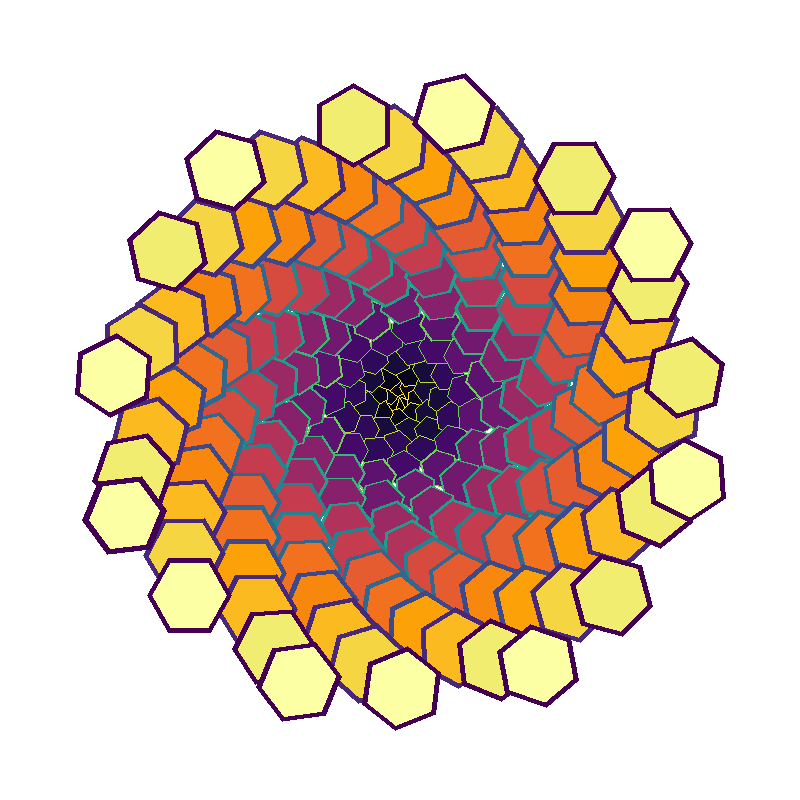

In [16]:
spiral2 = PILe()
spiral2.height, spiral2.width = 600, 600
x2, y2 = Spiral(n=200).quadratic(k=11)
spiral2.coords = x2, y2
spiral2.shapes = 'hexagon'

# Again, scaling the weights from [0, 1] to the wanted sizes
spiral2.widths = (- Distance(x2, y2).normal() * 5) + 6
spiral2.sizes = - Distance(x2, y2).normal() * 20 + 30

spiral2.colors = ColorPile().from_matplotlib('inferno', 20).map_to_distance(x2, y2)
spiral2.outlines = ColorPile().from_matplotlib('viridis', 10).invert().map_to_distance(x2, y2)
spiral2.angles = Angle(x2, y2).wave() * 45
spiral2.alphas = 255

img6 = Image.new("RGBA", (800, 800), (128, 128, 128, 0))
drawer = ImageDraws(img6)
drawer.DrawShapes(spiral2)

display(img6)

All attributes can be indexed by any array, used as an index.
Either colormaps:

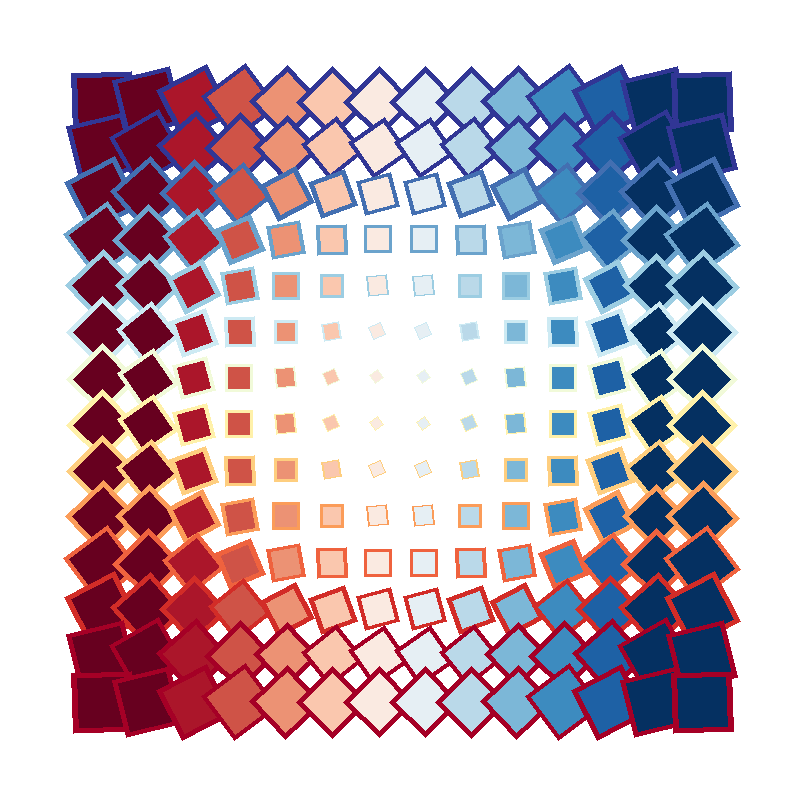

In [17]:
tiles = PILe()

tiles.height, tiles.width = 600, 600
x, y = Uniform(n=200).square()
tiles.coords = x, y
tiles.shapes = 'square'
# widths, sizes and angles will change through distance from centre of distribution
# We have to make sure the widths and sizes are positive integers in the end.
tiles.widths = (- Distance(x, y).normal() * 5) + 6
tiles.sizes = - Distance(x, y).normal(sd=0.6) * 25 + 30
tiles.angles = Distance(x, y).wave(waves=1) * 45 

# colors will be indexed by x or y axis.
tiles.colors = ColorPile().from_matplotlib('RdBu', 12).map_to_index(x)
tiles.outlines = ColorPile().from_matplotlib('RdYlBu', 12).invert().map_to_index(y)

tiles.alphas = 255

img7 = Image.new("RGBA", (800, 800), (128, 128, 128, 0))
drawer = ImageDraws(img7)
drawer.DrawShapes(tiles)

display(img7)


We can index sizes, widths, etc... as well:

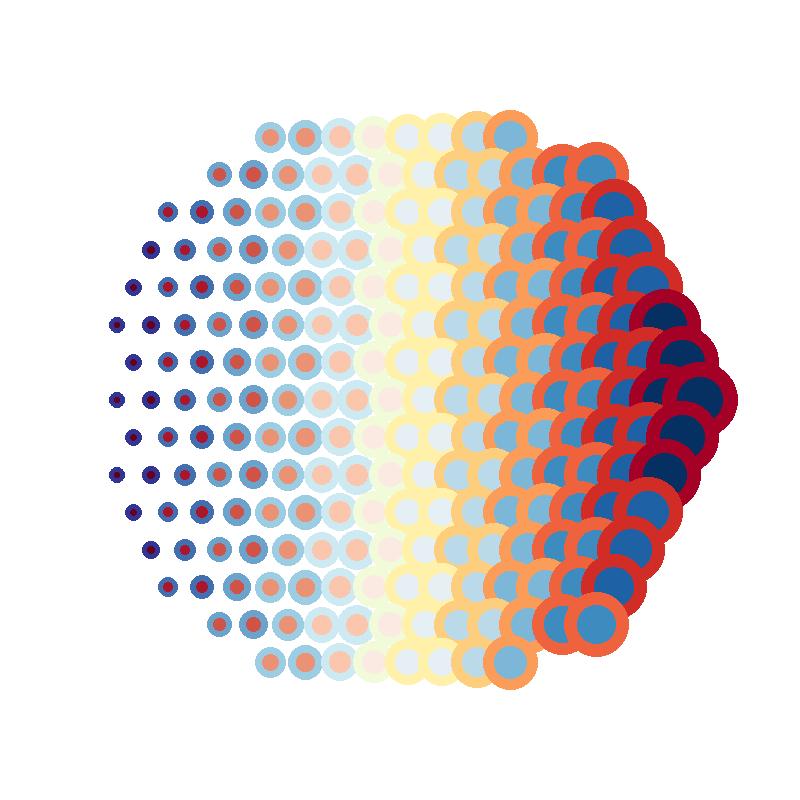

In [18]:
tiles2 = PILe()

tiles2.height, tiles2.width = 600, 600
x, y = Uniform(n=300).hexagon()

# x and y are numpy arrays, so we can manipulate them easily
mask = (x**2 + y**2) <= 1
x = x[mask]
y = y[mask]

tiles2.coords = x, y
tiles2.shapes = 'circle'
# widths and sizes and angles will change through axis
tiles2.widths = Value(x).as_index() * 10 + 5
tiles2.sizes = Value(x).as_index() * 25 + 5

# colors will be indexed by x or y axis.
tiles2.colors = ColorPile().from_matplotlib('RdBu', 12).map_to_index(x)
tiles2.outlines = ColorPile().from_matplotlib('RdYlBu', 12).invert().map_to_index(x)

tiles2.alphas = 255
tiles2.angles = 0

img8 = Image.new("RGBA", (800, 800), (128, 128, 128, 0))
drawer = ImageDraws(img8)
drawer.DrawShapes(tiles2)

display(img8)

# DrawLines
The module comes with a 'DrawLines' method, which will draw a line between (x, y) pairs of coordinates.
It uses the same dataclass and can be used with any previous PILe object. Example by drawing the lines between the centres of the rosetta:

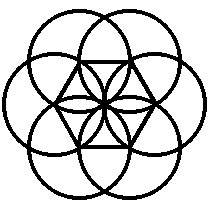

In [26]:
img4 = Image.new("RGBA", (210, 210), (255, 255, 255, 255))
drawer = ImageDraws(img4)
drawer.DrawShapes(rosetta) # First we draw the rosetta

# Drawlines will simply draw a line between each (x, y) pair of coordinates.
# closed = True will close the shape, drawing a line between the first and last point
drawer.DrawLines(rosetta, closed=True) # that's all.

display(img4)

The DrawLines method comes with 2 keyword arguments: continuous=True and closed=False by default.
They allow to control the behaviour of the method.
continous = True will draw a line between each point one by one, when continuous = False will draw a line every two points.
closed = True will draw a line between the last and first point, when closed = False will stop at the last point.

As an example:

In [48]:
# Let's create a Spiral distribution.
spiral = PILe() 
spiral.coords = Spiral(n=50).golden() 
spiral.height, spiral.width = 300, 300
spiral.outlines = 'black'
spiral.widths = 5


If we choose to don't close the drawing, we obtain what is expected:

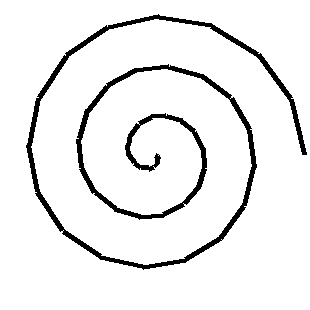

In [49]:
img3 = Image.new("RGBA", (310, 310), (255, 255, 255, 255))
drawer = ImageDraws(img3)
drawer.DrawLines(spiral, closed=False)
display(img3)

Closing the drawing will draw a line between the first and last point: 

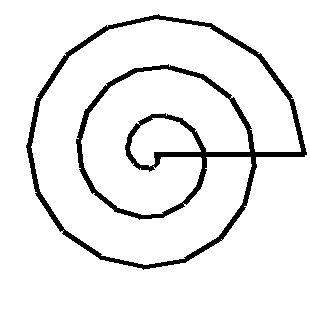

In [53]:
img3 = Image.new("RGBA", (310, 310), (255, 255, 255, 255))
drawer = ImageDraws(img3)
drawer.DrawLines(spiral, closed=True)
display(img3)

Choosing continuous=False will draw a line every two points:

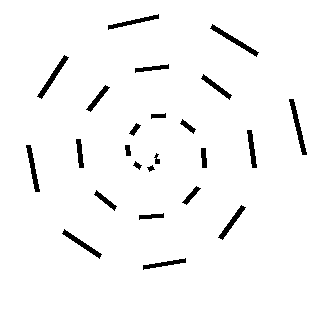

In [51]:
img3 = Image.new("RGBA", (310, 310), (255, 255, 255, 255))
drawer = ImageDraws(img3)
drawer.DrawLines(spiral, continuous=False)
display(img3)

We can make complex drawings with the DrawLines method as well:

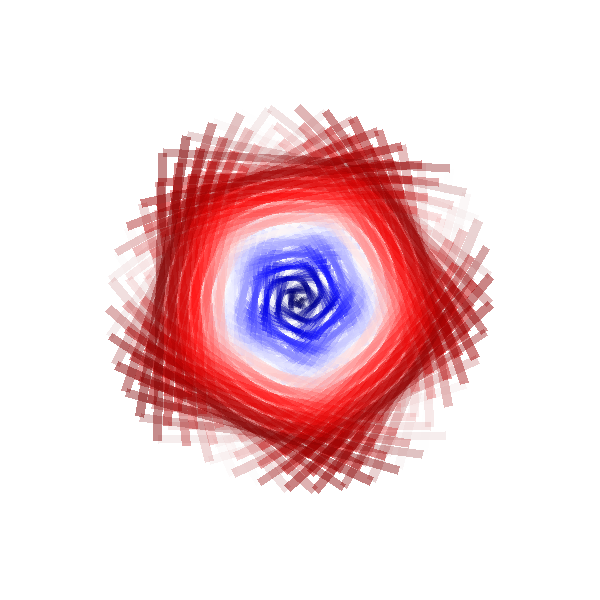

In [55]:
spiral3 = PILe()
spiral3.height, spiral3.width = 400, 400
x3, y3 = Spiral(n=500).quadratic(k=17)
spiral3.coords = x3, y3

spiral3.widths = (- Distance(x3, y3).normal() * 5) + 10

# Playing with outlines colors and not fill colors.
spiral3.outlines = ColorPile().from_matplotlib('seismic', 50).map_to_distance(x3, y3) 

spiral3.alphas = Angle(x3, y3).wave(waves=5) * 128

img7 = Image.new("RGBA", (600, 600), (128, 128, 128, 0))
drawer = ImageDraws(img7)
drawer.DrawLines(spiral3)

display(img7)

### Notes
PIL does not manage anti-aliasing. To create it, best method is to generate big images and then downsize them.
As an example, if we take the last image generated:


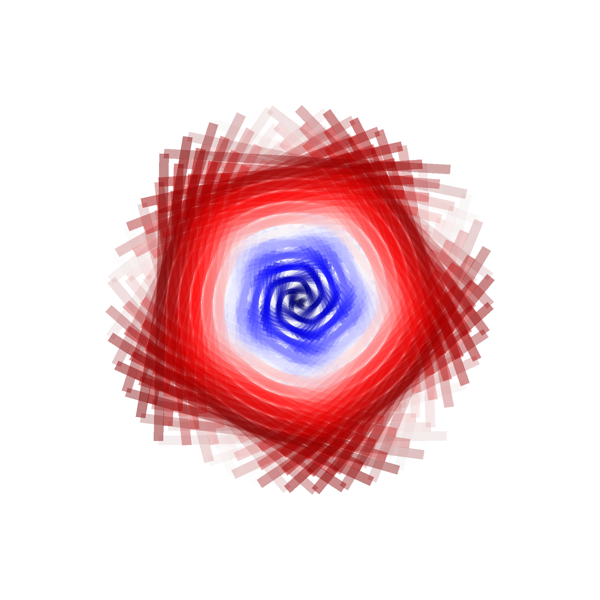

In [21]:
spiral3 = PILe()
spiral3.height, spiral3.width = 1200, 1200 # Let's make it BIG! Multiplying dimensions by 3.
x3, y3 = Spiral(n=500).quadratic(k=17)
spiral3.coords = x3, y3

spiral3.widths = (- Distance(x3, y3).normal() * 15) + 30 # Simply multiply everything by 3

# PLaying with outlines colors and not fill colors.
spiral3.outlines = ColorPile().from_matplotlib('seismic', 50).map_to_distance(x3, y3) 
spiral3.alphas = Angle(x3, y3).wave(waves=5) * 128

img7 = Image.new("RGBA", (1800, 1800), (128, 128, 128, 0)) # canvas size was multiplied by 3 as well.
drawer = ImageDraws(img7)

drawer.DrawLines(spiral3) # This will make a 1800 * 1800 image on a 2400 * 2400 canvas

img8 = img7.resize ((600, 600)) # And then downsize it to 800 * 800

display(img8) # Note the anti-aliased image compared to previous one.

Aliasing disappeared due to the downsizing. Note that it takes longer to draw big images, so it might be wise to do trials on small ones only.

# DrawImages

The module can work with images as well, repeating them at the desired coordinates.
The only difference is the parameter 'sizes', as it will be a multiplier of the original size of the image. It should be set to 1 for keeping the original size of the image.

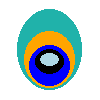

In [22]:
# First, creating a regular PIL image
tile = Image.new("RGBA", (100, 100), (255, 255, 255, 0))

tile_pict = PILe()
# We will draw shapes wherever we want, hence the values of 2.
tile_pict.width, tile_pict.height = 2, 2
tile_pict.coords = ([0, 0, 0, 0, 0], [0, 10, 16, 12, 10])
tile_pict.shapes = ['ellipse']
tile_pict.colors = ['light_sea_green', 'orange', 'blue', 'black', 'light_blue']
tile_pict.sizes = [40, 28, 20, 12, 6]
tile_pict.ratios = [0.8, 0.9, 1, 1.2, 1.5]

tile_pict.widths = 0
tile_pict.angles = 0 
# We draw the tile in a small image
drawer = ImageDraws(tile) 
drawer.DrawShapes(tile_pict) 

# Here is the tile
display(tile)

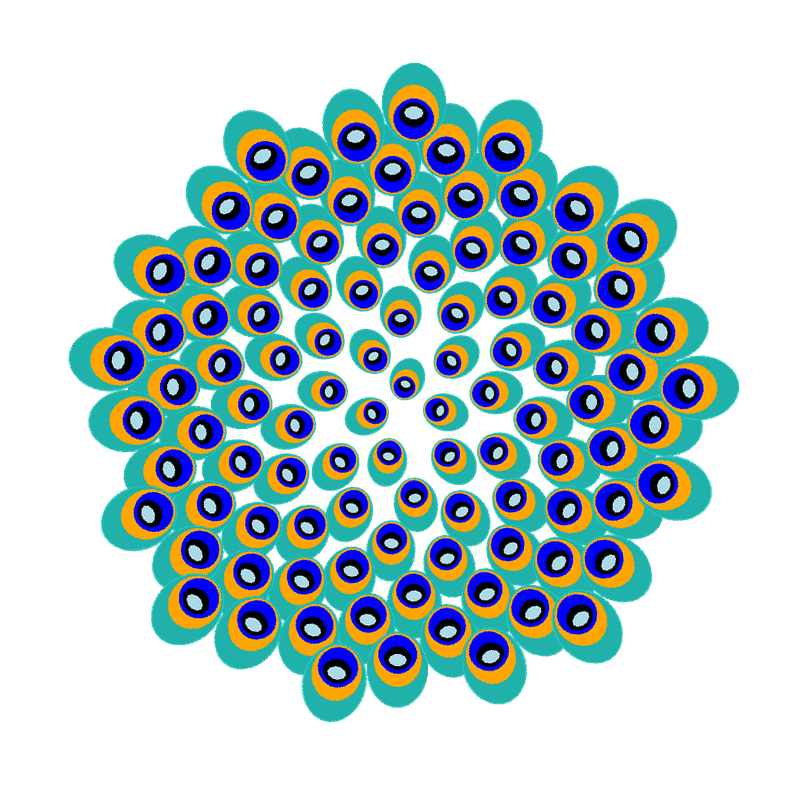

In [23]:
# Now we will distribute this image with a new PILe object:
img2 = Image.new("RGBA", (800, 800), (255, 255, 255, 0))

pattern = PILe()
pattern.height, pattern.width = 600, 600
# Distribution on a hexagonal lattice
x, y = Parametric(n=100).sunflower()
pattern.coords = x, y

# We simply put the previous image in the PILe Dataclass

pattern.images = tile
pattern.alphas = 255

# Images will be rotated along the x axis
# Angles follow radian notation, so starting at the right and going counter-clockwise. 
# And the image has to be rotated 90 degrees first.
pattern.angles = 90 + Angle(x, y).inc_uniform() * -360

# Size will vary according to the distance from the distribution centre, from half to full size.
pattern.sizes = Distance(x, y).inc_uniform() * 0.5 + 0.5

# And we draw the images with DrawImages
drawer = ImageDraws(img2)
drawer.DrawImages(pattern)

display(img2)